<div id="title_slide">
<h1 class=title_page>Introduction To GPU Programming</h1>
    <div class="title_page_info">
        <span class="main_author">Martin Schwinzerl</span>, Riccardo de Maria<br />
        HSS Section Meeting, CERN<br /> 
        June 3rd, 2020
    </div>'
</div>

<h2 class="slide">Goals</h2>
<ul class="level1">
    <li>Overview about the GPU computing landscape (Concepts, Hardware)</li>
    <li>Introduce the (currently) two most established frameworks</li>
    <li>Provide Simple Examples to get started</li>
    <li>Outline the typical workflow within a GPU enhanced Program</li>
    <li>Performance Analysis&amp; Constraints</li>
</ul>

<ul class="level1">
    <li><b>Motivate Design-Decisions &amp; Implementation of <span class="project_name">SixTrackLib</span></b></li>
</ul>

<p class="content">
    <b>Note:</b> This is an interactive Jupyter Notebook - all presented examples are designed to work 
    and allow you to experiment with them. Notbook available from:
</p>

<h2 class="slide">GPU Hardware Categories</h2>
<div class="multi_cols">
    <div style="width: 50%; float: left;">
    <ul class="level1">
        <li><b>Low-End Gaming: &asymp; 100 EUR</b>
        <ul class="level2">
            <li>Still equal or better FP performance than typical CPU in SP and DP</li>
            <li>DP performance usualy much poorer than SP!</li>
        </ul>
        </li>
    </ul>
    </div>
    <div style="margin-left: 50%;"> 
    <ul class="level1">
        <li>AMD RX 560 TI 4 GByte
        <ul class="level2">
            <li>1024 Cores</li>
            <li>SP Peak Performance 2406 GFLOP/s</li>
            <li>DP Peak Performance  163 GFLOP/s &asymp; 1/16 SP</li>
        </ul></li>
        <li>NVidia GTX 1050 Ti 4 GByte
        <ul class="level2">
            <li>768 Cores</li>
            <li>SP Peak Performance 1981 GFLOP/s</li>
            <li>DP Peak Performance 62 GFLOP/s = 1/32 SP</li>
        </ul>
        </li>
    </ul>    
    </div>
    <ul class="level1">
        <li>SP ... IEEE754 32Bit single precision floating point numbers</li>
        <li>DP ... IEEE754 64Bit double precision floating point numbers</li>
    </ul>
</div>

<h2 class="slide">GPU Hardware Categories</h2>
<div class="multi_cols">
    <div style="width: 50%; float: left;">
    <ul class="level1">
        <li>Low-End Gaming: &asymp; 100 EUR</li>
        <li><b>High-End Gaming: &leq; 1000 EUR</b>
        <ul class="level2">
            <li>Substancial performance in SP</li>
            <li>DP performance varies!</li>
        </ul>
        </li>
    </ul>
    </div>
    <div style="margin-left: 50%;"> 
    <ul class="level1">
        <li>NVidia GeForce RTX 2080 8GByte
        <ul class="level2">
            <li>3072 Cores</li>
            <li>SP Peak Performance 8920 GFLOP/s</li>
            <li>DP Peak Performance 279 GFLOP/s = 1/32 SP</li>
        </ul>
        </li>
        <li>AMD RX Vega 64 8 GByte
        <ul class="level2">
            <li>3840 Cores</li>
            <li>SP Peak Performance 11518 GFLOP/s</li>
            <li>DP Peak Performance   720 GFLOP/s = 1/16 SP</li>
        </ul></li>
    </ul>    
    </div>
    <ul class="level1">
        <li>SP ... IEEE754 32Bit single precision floating point numbers</li>
        <li>DP ... IEEE754 64Bit double precision floating point numbers</li>
    </ul>
</div>

<h2 class="slide">GPU Hardware Categories</h2>
<div class="multi_cols">
    <div style="width: 50%; float: left;">
    <ul class="level1">
        <li>Low-End Gaming: &asymp; 100 EUR</li>
        <li>High-End Gaming: &leq; 1 kEUR</li>
        <li><b>Hybrid HPC: &asymp; 3 kEUR - 8 kEUR</b>
        <ul class="level2">
            <li>Substantial performance in SP</li>
            <li>DP performance &asymp; 1/2 SP</li>
        </ul></li>
        <li><b>Server HPC: &asymp; 6 kEUR - 8 kEUR</b>
        <ul class="level2">
            <li>Similar performance characteristics as with hybrid HPC, but</li>
            <li>No video outputs, i.e. "Accelerator Card"</li>
        </ul></li>
    </ul>
    </div>
    <div style="margin-left: 50%;"> 
    <ul class="level1">
        <li>NVidia Titan V 12 GBytes
        <ul class="level2">
            <li>3072 Cores</li>
            <li>Hybrid card - Video outputs available</li>
            <li>SP Peak Performance 12288 GFLOP/s</li>
            <li>DP Peak Performance 6144 GFLOP/s = 1/2 SP</li>
        </ul>
        </li>
        <li>AMD Radeon Instinct MI50 16 GBytes
        <ul class="level2">
            <li>3840 Cores</li>
            <li>SP Peak Performance 13400 GFLOP/s</li>
            <li>DP Peak Performance 6700 GFLOP/s = 1/2 SP</li>
        </ul></li>
    </ul>    
    </div>
    <ul class="level1">
        <li>SP ... IEEE754 32Bit single precision floating point numbers</li>
        <li>DP ... IEEE754 64Bit double precision floating point numbers</li>
    </ul>
</div>

<h2 class="slide">GPU Hardware Categories</h2>
<div class="multi_cols">
    <div style="width: 50%; float: left;">
    <ul class="level1">
        <li>Low-End Gaming: &asymp; 100 EUR</li>
        <li>High-End Gaming: &leq; 1 kEUR</li>
        <li>Hybrid HPC: &asymp; 3 kEUR - 8 kEUR</li>
        <li>Server HPC: &asymp; 6 kEUR - 8 kEUR</li>
        <li><b>AI Server HPC: &asymp; 6 kEUR - 10 kEUR</b></li>
    </ul>
    </div>
    <div style="margin-left: 50%;"> 
    <ul class="level1">
        <li>Substancial Integer, SP and Half-Precision Performance or</li>
        <li>TOPS ... Trillion operations per second of dedicated neural network computes</li>
        <li>Task-specific Hybrid systems with FPGA and/or CPU enhancements</li>
        <li>No classical GPU, no video outputs "Accelerator Card"</li>
    </ul>    
    </div>
</div>
<ul class="level1">
    <li>SP ... IEEE754 32Bit single precision floating point numbers</li>
    <li>DP ... IEEE754 64Bit double precision floating point numbers</li>
</ul>


<h2 class="slide">CPUs versus GPUs</h2>
<div class="multi_cols">
    <div style="width: 50%; float: left;">
    <table class="default">
        <tr>
            <th></th>
            <th>CPU</th>
            <th>GPU</th>
        </tr>
        <tr>
            <td>Cores / Compute Units</td>
            <td>2 - 64 (128 HT/SMT)</td>
            <td>16 - 80</td>
        </tr>
        <tr>
            <td>Arithmetic Units / Core</td>
            <td>2-8</td>
            <td>64</td>
        </tr>
        <tr>
            <td>Peak Performance SP</td>
            <td>24-3200 GFLOP/s</td>
            <td>1000-19500 GFLOP/s</td>
        </tr>
        <tr>
            <td>Peak Performance DP</td>
            <td>12-1600 GFLOP/s</td>
            <td>50-9700 GFLOP/s</td>
        </tr>
    </table>
    </div>
    <div style="margin-left: 50%; text-align: left;">
    <p>Compared to CPUs, GPUs have:</p>
    <ul class="level1">
        <li>More arithmetic units (in particular SP)</li>
        <li>Less logic for control flow</li>
        <li>Less registers per arithmetic units</li>
        <li>Less memory but larger memory bandwidth</li>
    </ul>
    </div>
</div>
<ul class="level1">
    <li>SP ... IEEE754 32Bit single precision floating point numbers</li>
    <li>DP ... IEEE754 64Bit double precision floating point numbers</li>
    <li>For CPUs: DP performance is roughly 1/2 of SP performance (YMMV)</li>
</ul>

<h2 class="slide">Introducing Parallelism</h2>
<ul class="level1">
    <li><b>Task Parallelism:</b> perform multiple tasks on the same dataset<br />
    Example: Check if a number is a prime number by checking divisibility in parallel</li>
</ul>

<h2 class="slide">Introducing Parallelism</h2>
<ul class="level1">
    <li><b>Data Parallelism:</b> perform the same task on multiple datasets<br />
    Example: Vector addition</li>
</ul>
<img src="images/data_parallelism.svg" alt="graphical representation of data-parallelism using a vector addition as an example" width="60%" />

<h2 class="slide">Example: Vector Addtion on the GPU using CuPy</h2>
<p class="content">
    Cf. <a href="https://github.com/cupy/cupy">https://github.com/cupy/cupy</a> and 
    <a href="https://cupy.chainer.org/">https://cupy.chainer.org/</a> for reference
</p>

In [1]:
# If you have a NVidia GPU, one of the simplest ways to offload calculations to the GPU is to use CuPy

import cupy
import numpy as np

N = 10000000 # 1.0e7 elements 

x_host = np.random.rand( N )
y_host = np.random.rand( N )

# Create vectors of random numbers. CuPy handles all the required steps behind the scenes
x = cupy.asarray( x_host )
y = cupy.asarray( y_host )

# x and y are cupy entities that "live" on the GPU while 
# x_host and y_host "live" in regular memory
# The same applies to the result of the calculation z:

z = x + y  # Vector addition is actually performed on the GPU

In [2]:
# in order to make use of the result outside of the GPU, 
# we have to convert z into a regular numpy array
z_host = cupy.asnumpy( z )

# Compare result to calculation on CPU
print( f"calculation on host and device yield same result: {np.allclose( z_host, x_host + y_host, rtol=0.0, atol=1e-16)}" )

del x, y, z, x_host, y_host, z_host

calculation on host and device yield same result: True


<h2 class="slide">Overview: Frameworks, Libraries, Toolboxes for GPU Programming</h2>
<ul class="level1">
    <li>High-Level Libraries and Applications
        <ul class="level2">
            <li>CuPy: numpy-like python module for NVIDIA GPUs</li>
            <li>Tensorflow: mostly support for NVIDIA GPUs, some opportunities to use other cards via SYCL</li>
            <li>Matlab (currently only NVIDIA GPUs are supported)</li>
            <li>Julia</li>
            <li>Mathematica</li>
            <li>....</li>
        </ul></li>
    <li>HPC frameworks &amp; libraries
        <ul class="level2">            
            <li>OpenMP: &geq; version 4.5, allows offloading to GPU targets (for AMD, a recent gcc or clang is 
                required)</li>
            <li>OpenACC: similar to OpenMP. Traditionally NVIDIA focused but recently got
                capabilities to offload to AMD</li>
            <li>Intel OneAPI</li>
            <li>ArrayFire: optimized functions and data-structures to exploit parallelism on both GPUs and 
                CPUs</li>
        </ul></li>
</ul>

<h2 class="slide">Overview: Frameworks, Libraries, Toolboxes for GPU Programming</h2>
<ul class="level1">
    <li>Low-Level Programming Frameworks
        <ul class="level2">
            <li>ROCm: collection of libraries and tools to target AMD GPUs, provides an 
                <span style="color: maroon;">OpenCL</span> backend</li>            
            <li>HIP: abstract language to write GPU programs by AMD (open-source), allows "automated" translation 
                of <span style="color: blue;">CUDA</span> programs into HIP</li>
            <li>SyCL: "modernized" abstraction on-top of <span style="color: maroon;">OpenCL</span>, uses 
                <span style="color: #5500d4;">SPIR</span></li>
            <li>clang + <span style="color: #5500d4;">SPIR-V</span>: 
                compile code fragments to a intermediate format consumable by modern 
                <span style="color: maroon;">OpenCL</span> implementations</li>
            <li>clang + <span style="color: #5500d4;">PTX</span>: 
                compile code fragments to an intermediate format consumable by 
                <span style="color: blue;">CUDA</span> (NVRTC)</li>
            <li>....</li>
            <li><span style="color: blue;">CUDA</span> C99/C++1x based framework for NVIDIA GPUs (some parts are 
                open-source, drivers etc. are proprietary)</li>
            <li><span style="color: maroon;">OpenCL</span>: Vendor neutral computing language, allows to target 
                CPUs, GPUs, FPGAs, Signal Processors</li>
        </ul></li></ul>
            

<ul class="level1">
    <li>Code-Transformation tools and intermediate code representations play an increasingly central role
        <ul class="level2">
            <li><span style="color: #5500d4;">PTX</span>: Parallel Thread Execution language, used by NVIDIA for 
                CUDA</li> 
            <li><span style="color: #5500d4;">SPIR, SPIR-V</span>: Standard Portable Intermediate Representation, 
                cross-platform open standard maintained by the Khronos Group; Central in newer graphic standards 
                and newer iterations of OpenCL</li>
        </ul></li></ul>

<h2 class="slide">Comparison: OpenCL versus CUDA</h2>
<div class="multi_cols">
    <div style="width: 50%; float: left;">
        <ul class="level1">
            <li><span style="color: maroon;">OpenCL</span>
            <ul class="level2">
            <li>Hardware Neutral: GPUs, CPUs, FPGAs, Signal Processors</li>
            <li>Common software stack standardized by Khronos Group + vendor specific implementations</li>
            <li>Programs should work across implementations → "Programming to the least common denominator"</li>
            <li>OpenCL 1.2: Still most commonly used, C99 kernel language, limited set of features, but works 
                virtually everywhere (incl. NVIDIA GPUs)</li>
            <li>OpenCL 2.x: some support from AMD and Intel</li>
            <li>OpenCL 3.0: recently specified, attempts to move forward by making requirements more modular</li> 
        </ul></li>
        </ul>
    </div>
    <div style="margin-left: 50%;"> 
        <ul class="level1">
            <li><span style="color: blue;">CUDA</span>
            <ul class="level2">
                <li>Hardware: Only NVIDIA GPUs, no CPU / emulator available</li>
                <li>Software implementation only available from NVIDIA, includes libraries, debuggers, profilers, 
                    memory checkcers, etc.</li>
                <li>Software and hardware tightly integrated (versioning, "compute capabilites")</li>
                <li>Version 10.x allowing both C99 and C++11/14 kernel language</li>
            </ul></li>
        </ul>
    </div>
 </div>    
    

<div class="multi_cols">
    <div style="width: 50%; float: left;">
        <ul class="level1">
            <li><b>Primarily</b>: Run-time compilation of the kernels</li>
            <li>Kernel code has to be available at run time, compile for selected device at run-time</li>
            <li>Single-file compilation similar to the default in CUDA available (SyCL)</li>
        </ul>
    </div>
    <div style="margin-left: 50%;"> 
        <ul class="level1">
            <li><b>Primarily</b>: Single-file compilation. The system compiler is "replaced" by CUDA provided 
                nvcc compiler</li>
            <li>This requires binary compability between system compiler, system libraries, graphic stacks and 
                drivers</li>            
            <li>Run-time compilation approach simliar to the default with OpenCL is available (NVRTC)</li>
        </ul>
    </div>
</div>

<h2 class="slide">CUDA and OpenCL: Different But Similar - Grid</h2>
<ul class="level1">
    <li>Threads are organized in two layers resembling a 3D grid</li>
    <li>Simpler use-cases only requiring 1D or 2D topologies are mapped on the 3D structure</li>
</ul>
<img src="images/opencl_cuda_grid.png" width="67%" />


<h2 class="slide">CUDA and OpenCL: Different But Similar - Memory Model</h2>
<ul class="level1">
    <li>Hierarchical memory model with different "regions"</li>
    <li>Visibility allows data exchange across individual threads / work-items but may require synchronization</li>
    <li>On CUDA, closely linked to Hardware implementation</li>
    <li>On OpenCL, guarantees about different memory regions are more difficult to give</li>
</ul>
<img src="images/opencl_cuda_memory_regions.png" width="66%" />


<h2 class="slide">Structure Of A Simple GPU Program</h2>
<img src="images/anatomy_of_gpu_program_01.png" width="60%" />

<h2 class="slide">Structure Of A Simple GPU Program</h2>
<img src="images/anatomy_of_gpu_program_02.png" width="60%" />

<h2 class="slide">Structure Of A Simple GPU Program</h2>
<img src="images/anatomy_of_gpu_program_03.png" width="60%" />

<h2 class="slide">Structure Of A Simple GPU Program</h2>
<img src="images/anatomy_of_gpu_program_04.png" width="60%" />

<h2 class="slide">Structure Of A Simple GPU Program</h2>
<img src="images/anatomy_of_gpu_program_05.png" width="60%" />

<h2 class="slide">Structure Of A Simple GPU Program</h2>
<img src="images/anatomy_of_gpu_program_06.png" width="60%" />

<h2 class="slide">Structure Of A Simple GPU Program</h2>
<img src="images/anatomy_of_gpu_program_07.png" width="60%" />

<h2 class="slide">Example: Vector Addtion on the GPU using PyCuda</h2>
<p class="content">
    Cf. <a href="https://github.com/inducer/pycuda">https://github.com/inducer/pycuda</a> and 
    <a href="https://documen.tician.de/pycuda/">https://documen.tician.de/pycuda/</a> for reference
</p>

In [3]:
# Again, a NVIDIA GPU is required for this example to work!
import pycuda.autoinit
import pycuda.driver as cuda
import numpy as np
from pycuda.compiler import SourceModule

# First, we prepare the program that should be applied to our data, i.e. the "Kernel"
vec_add_program = SourceModule( 
"""
__global__ void sum_kernel( double* __restrict__ z, 
                            double const* __restrict__ x, 
                            double const* __restrict__ y, int const N )
{
    const int threads_per_block = blockDim.x; /* Assuming 1D grid */
    const int ii = threadIdx.x + blockIdx.x * threads_per_block; /* Assuming 1D grid */    
    if( ii < N ) 
    {
        z[ ii ] = x[ ii ] + y[ ii ];
    }
}
""")

# Note: even though we are using CUDA, we are able to specify the kernel at run-time ->
# PyCuda uses the NVRTC implementation!

vec_add_kernel = vec_add_program.get_function( "sum_kernel" ) 

In [4]:
# then, we prepare the structures on the host side, allocate the
# required resources on the device side and move things 

N = 10000000 # Again, 10^7 elements to the vector

x_host = np.random.randn( N ) # prepare the elements on the host
y_host = np.random.randn( N )

# allocate the structures on the device
x = cuda.mem_alloc( x_host.nbytes )
y = cuda.mem_alloc( y_host.nbytes )
z = cuda.mem_alloc( max( x_host.nbytes, y_host.nbytes ) )

#transfer the memory from the host to the device; htod ... host to device
cuda.memcpy_htod( x, x_host )
cuda.memcpy_htod( y, y_host ) 

In [5]:
# find the grid dimensions:
threads_per_block = 128 # This is a pessimistic but educated guess :-)
num_blocks = N // threads_per_block
if N % threads_per_block != 0:
    num_blocks += 1

# run the kernel
N_arg = np.int32(N) # pycuda enforces strict type checking
vec_add_kernel( z, x, y, np.int32(N), block=(threads_per_block, 1, 1), grid=(num_blocks,1))

# copy the result back to the host; dtoh ... device to host
z_host = np.empty_like( x_host )
cuda.memcpy_dtoh( z_host, z )


# Compare result to calculation on CPU
print( f"calculation on host and device yield same result: {np.allclose( z_host, x_host + y_host, rtol=0.0, atol=1e-16)}" ) 

del x, y, z, x_host, y_host, z_host

calculation on host and device yield same result: True


<h2 class="slide">Example: Vector Addtion on the GPU using PyOpenCL</h2>
<p class="content">
    Cf. <a href="https://github.com/inducer/pycuda">https://github.com/inducer/pyopencl</a> and 
    <a href="https://documen.tician.de/pyopencl/">https://https://documen.tician.de/pyopencl/</a> for reference
</p>

In [6]:
import pyopencl as cl
import numpy as np

# setup the OpenCL environment - it's a bit more elaborated as with PyCuda:
# Shortcut: ctx = cl.create_some_context() -> create a context with the first available device

platforms = cl.get_platforms()
for p in platforms:
    print( p )

<pyopencl.Platform 'AMD Accelerated Parallel Processing' at 0x7fc00450a250>
<pyopencl.Platform 'NVIDIA CUDA' at 0x3d31de0>
<pyopencl.Platform 'Portable Computing Language' at 0x7fc00dece020>


In [9]:
platform = platforms[ 0 ] # Let's select the first one

# get a list of all available devices for a platform
devices = platform.get_devices()

for d in devices:
    print( d )

<pyopencl.Device 'gfx900' on 'AMD Accelerated Parallel Processing' at 0x33ec260>


In [10]:
# Again, let's select the first device
device = devices[ 0 ]

# create a context and a queue
ctx = cl.Context( [device,] )
queue = cl.CommandQueue( ctx )

In [11]:
# prepare the program containing the kernel:
vec_add_program = cl.Program( ctx, """
__kernel void sum_kernel( __global double* restrict z,
                          __global double const* restrict x,
                          __global double const* restrict y, int const N )
{
    int const ii = ( int )get_global_id( 0 ); /* Assume 1D Grid, 0 .. 0th element of ndrange */
    if( ii < N )
    {
        z[ ii ] = x[ ii ] + y[ ii ];
    }
}
                          
""" )

# Compile the program containing the kernel
vec_add_program.build()

# get kernel function from vec_add_program
vec_add_kernel = vec_add_program.sum_kernel

In [12]:
# then, we prepare the structures on the host side, allocate the
# required resources on the device side and move things 
N = 10000000 # Again, 10^7 elements to the vector

# create the structures on the host 
x_host = np.random.rand( N )
y_host = np.random.rand( N )


# allocate the structures on the device
x = cl.Buffer( ctx, cl.mem_flags.READ_ONLY, x_host.nbytes )
y = cl.Buffer( ctx, cl.mem_flags.READ_ONLY, y_host.nbytes )
z = cl.Buffer( ctx, cl.mem_flags.WRITE_ONLY, max( x_host.nbytes, y_host.nbytes ) )

#transfer the memory from the host to the device
cl.enqueue_copy( queue, x, x_host )
cl.enqueue_copy( queue, y, y_host )


In [13]:
# find the grid dimensions:
num_work_items = x_host.shape
workgroup_size = None # let the OpenCL impl find the optimal workgroup size

# run the kernel
Narg = np.int32(N) # like with OpenCL
vec_add_kernel( queue, num_work_items, workgroup_size, z, x, y, Narg )

# copy the result back to the host
z_host = np.empty_like( x_host )
cl.enqueue_copy( queue, z_host, z )

In [14]:
# Compare result to calculation on CPU
print( f"calculation on host and device yield same result: {np.allclose( z_host, x_host + y_host, rtol=0.0, atol=1e-16)}" )

del x, y, z, x_host, y_host, z_host

calculation on host and device yield same result: True


<h2 class="slide">Performance Analysis: Scaling</h2>
<ul class="level1">
    <li>Program with a total run-time $T$</li>
    <li>Assumption: problem size is <b>constant</b> (e.g. add vectors of size $N$, track $N$ particles, etc.)</li>
    <li>Question: how much can we speed up the execution of the problem if we parallelise it, i.e. 
        the speed-up $\eta_s( n_p )$</li>
</ul>

<ul class="level1">
    <li>$T = t_p + t_s$</li>
    <li>$t_p$: fraction of run-time that can be run in "parallel" on $n_p$ "processors"</li>
    <li>$t_s$: fraction of run-time that is sequential</li>
    <li>Amdahls law:
        $$\eta_s( n_p ) = \frac{T}{t_s + \frac{t_p}{n_p}}$$</li>
</ul>

<h2 class="slide">Performance Analysis: Scaling</h2>

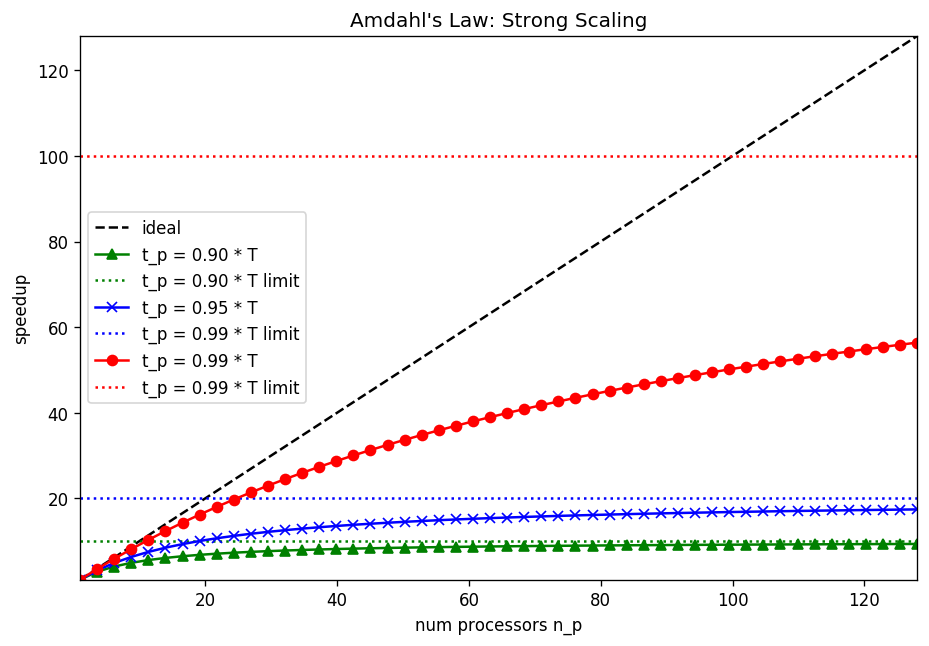

In [16]:
from helpers import plot_amdahl_scaling
plot_amdahl_scaling( 1.0, 128.0 )

<h2 class="slide">Performance Analysis: Conclusions from Amdahl's Law</h2>
<ul class="level1">
    <li>For a given problem with finite $t_s$, increases in performance are diminishing with rising $n_p$</li> 
    <li>Controling and limiting $t_s$ is crucial to achieve good parallel performance and speedup</li>
    <li>We assume that $t_s = const.$ for a given problem size. In practice, $t_s = f(n_p)$</li>
    <li>Even with $t_s$ very small, scaling to $10^3$ or even $10^4$ of parallel processes (as in GPUs) under the 
        assumptions of Amdahl is hard</li>
</ul>

<h2 class="slide">Scaled Speedup, Gustafson-Barsis Law</h2>
<ul class="level1">
    <li>Amdahl's Law is a bit pessimistic $\longleftarrow$ fixed problem size regardless of $n_p$</li>
    <li>What if we can <b>grow</b> the problem size together with rising number $n_p$?</li>
    <li>Scaled Speedup: $$\eta(n_p) = f_s + n_p \cdot f_p$$</li>
    <li>$f_s = t_s / T$, fraction of the runtime that is serial</li>
    <li>$f_p = t_p / T$, fraction of the runtime that can be run in parallel on $n_p$ processors.</li>
    <li>It holds that $f_s + f_p = 1$</li>
</ul>

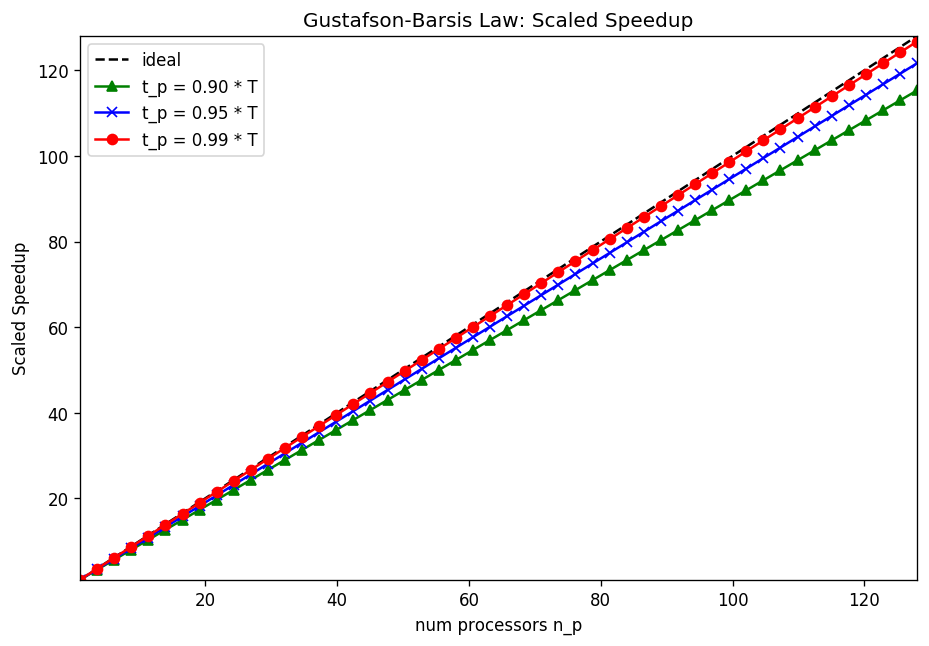

In [18]:
from helpers import plot_gustafson_scaling
plot_gustafson_scaling( 1.0, 128.0 )

<h2 class="slide">Contributions to $t_s$ on GPUs</h2>
<ul class="level1">    
    <li>Synchronization overhead between "processes" (threads) $\longrightarrow$ Problems that do not require 
            communication between processes are more suitable to be parallelized (ideal: "Embarrisingly Parallel 
            Problem")</li>        
        <li>Latencies and transfer times for copying memory between host and device</li>
        <li>latencies in launching kernels</li>
        <li>Latencies for accessing resources (different memory regions!)</li>
        <li>During the runtime of the kernel: <b>thread divergence</b></li>    
</ul>

<ul class="level1">
    <li>Thread divergence is a consequence of the SPMD model typically implemented on GPUs</li>
    <li>Remember: Threads/work-items are organized in warps/wavefronts</li>
    <li>AMD: $64$ work-items / wavefront</li>
    <li>NVIDIA: $32$ threads/workitems / warp</li>
    <li>The GPU always executes a multiple of these numbers, even if you only ask to compute $1$ work-items 
                / threads</li>
    <li>All threads execute the <b>same program</b> in lock-step</li>
    <li>Dataparallelism: If the program branches depending on the data, code-paths have to be handled 
                sequentially, thus increasing the $t_s$!</li>
</ul>

<h2 class="slide">Example: Thread Divergence And Branching</h2>
<img src="images/thread_divergence_example2_01.png" alt="thread divergence example 2" />

<h2 class="slide">Example: Thread Divergence And Branching</h2>
<img src="images/thread_divergence_example2_02.png" alt="thread divergence example 2" />

<h2 class="slide">Example: Thread Divergence And Branching</h2>
<img src="images/thread_divergence_example2_03.png" alt="thread divergence example 2" />

<h2 class="slide">Example: Thread Divergence And Branching</h2>
<img src="images/thread_divergence_example2_04.png" alt="thread divergence example 2" />

<h2 class="slide">Example: Thread Divergence And Branching</h2>
<img src="images/thread_divergence_example2_05.png" alt="thread divergence example 2" />

<h2 class="slide">Example: Alternative, Branchless Formulation of Kernel</h2>
<img src="images/thread_divergence_example2_better.png" alt="thread divergence example 2" />

<h2 class="slide">Summary &amp; Conclusions</h2>
<ul class="level1">
    <li>GPUs offer a large number of threads and significant floating-point computing power</li>
    <li>There are many options to get started with GPU programming without starting to go fully towards low-level 
        programming</li>    
    <li>The two current main frameworks, OpenCL and CUDA, differ in scope and implementation but are similar enough 
        that a common implementation of Kernels is possible</li>
    <li> Controlling and Limiting the sequential run-time component is crucial to achieve good scaling and 
            parallel performance</li>
    <li> Thread Divergence can be a key contributor to the sequential runtime-portion</li>
    <li> Not covered: optimal grid dimensions and hardware utilization</li>
</ul>

<div id="title_slide">
<h1 class=title_page>Thank You For Your Attention!</h1>    
</div>